# Context of Data

- Company - UK-based and registered non-store online retail
- Products for selling - Mainly all-occasion gifts
- Customers - Most are wholesalers (local or international)
- Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings('ignore')

# Import CSV file

In [2]:
data = pd.read_csv('Ecommerce - UK Retailer.csv', encoding= 'unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

- Filling Null values with mode in Description

In [4]:
data['Description'].fillna(data['Description'].mode()[0],inplace=True)

In [5]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


- Finding Null values

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- Dropping null values in CustomerID

In [7]:
data.dropna(subset=['CustomerID'], inplace = True)

In [8]:
data.isnull().sum()



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
data['InvoiceNo'] = data['InvoiceNo'].str.replace(r'[^\d.]+', '')
data['StockCode'] = data['StockCode'].str.replace(r'[^\d.]+', '')

In [11]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


-Changing datatypes of the columns

In [12]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
data = data[data.StockCode.apply(lambda x: x.isnumeric())]


In [15]:
data['StockCode'] = data['StockCode'].astype(int)
data['InvoiceNo'] = data['InvoiceNo'].astype(int)

In [16]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

In [17]:
data.dtypes

InvoiceNo               int32
StockCode               int32
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# Dropping negative values in 'Quantity' column

- 4. Remove rows which have negative values in Quantity column

In [18]:
data = data[(data['Quantity'] >= 0) | (data['Quantity'].isnull())]

In [19]:
data.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID
count,396503.000000,396503.000000,396503.000000,396503.000000,396503.000000
mean,560618.883537,30752.859121,13.042436,2.883838,15301.360625
std,13106.260124,20610.546545,180.703417,4.354371,1709.793660
min,536365.000000,2.000000,1.000000,0.000000,12346.000000
25%,549235.000000,22027.000000,2.000000,1.250000,13975.000000
50%,561893.000000,22666.000000,6.000000,1.950000,15159.000000
75%,572092.000000,23270.000000,12.000000,3.750000,16801.000000
max,581587.000000,90214.000000,80995.000000,649.500000,18287.000000


In [20]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Deleting Duplicate Rows

- f. Duplicate values across all columns
- 3. Remove duplicate rows

In [21]:
duplicate = data[data.duplicated()]

duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [22]:
data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Adding new columns 

- Add the columns - Month, Day and Hour for the invoice

In [23]:
data['Invoice_month']= data['InvoiceDate'].dt.month
data['Invoice_day']= data['InvoiceDate'].dt.day
data['Purchase_time']= data['InvoiceDate'].dt.hour
data['Sales']=data['Quantity'] * data['UnitPrice']

In [24]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Invoice_day,Purchase_time,Sales
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,8,22.00
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,9,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,12,16.60


In [25]:
data.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Invoice_month,Invoice_day,Purchase_time,Sales
count,396503.000000,396503.000000,396503.000000,396503.000000,396503.000000,396503.000000,396503.000000,396503.000000,396503.000000
mean,560618.883537,30752.859121,13.042436,2.883838,15301.360625,7.613085,15.041369,12.729535,22.112702
std,13106.260124,20610.546545,180.703417,4.354371,1709.793660,3.416367,8.653685,2.272995,308.834995
min,536365.000000,2.000000,1.000000,0.000000,12346.000000,1.000000,1.000000,6.000000,0.000000
25%,549235.000000,22027.000000,2.000000,1.250000,13975.000000,5.000000,7.000000,11.000000,4.680000
50%,561893.000000,22666.000000,6.000000,1.950000,15159.000000,8.000000,15.000000,13.000000,11.800000
75%,572092.000000,23270.000000,12.000000,3.750000,16801.000000,11.000000,22.000000,14.000000,19.800000
max,581587.000000,90214.000000,80995.000000,649.500000,18287.000000,12.000000,31.000000,20.000000,168469.600000


# Outliers / Boxplot

- Boxplot – All Numeric Variables

In [26]:
data.Quantity.quantile(0.99)

120.0

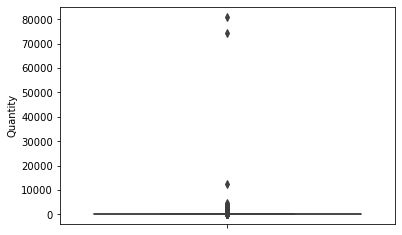

In [27]:
sns.boxplot(y='Quantity', data=data)

In [28]:
data.drop(data[data['Quantity'] > 120].index, inplace=True)

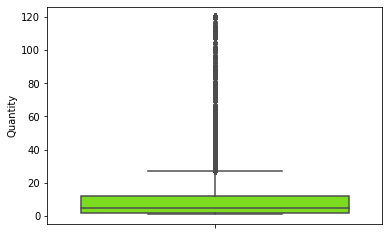

In [29]:
sns.boxplot(y='Quantity', data=data,color='lawngreen')

In [30]:
data.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Invoice_month,Invoice_day,Purchase_time,Sales
count,392614.000000,392614.000000,392614.000000,392614.000000,392614.000000,392614.000000,392614.000000,392614.000000,392614.000000
mean,560629.180995,30713.241764,9.860125,2.899008,15300.931363,7.615798,15.044830,12.734727,18.030129
std,13112.973067,20565.341273,14.553920,4.371188,1708.876246,3.417124,8.656275,2.269731,69.725833
min,536365.000000,2.000000,1.000000,0.000000,12347.000000,1.000000,1.000000,6.000000,0.000000
25%,549235.000000,22027.000000,2.000000,1.250000,13975.000000,5.000000,7.000000,11.000000,4.650000
50%,561894.000000,22666.000000,5.000000,1.950000,15159.000000,8.000000,15.000000,13.000000,11.600000
75%,572103.000000,23268.000000,12.000000,3.750000,16800.000000,11.000000,22.000000,14.000000,19.350000
max,581587.000000,90214.000000,120.000000,649.500000,18287.000000,12.000000,31.000000,20.000000,38970.000000


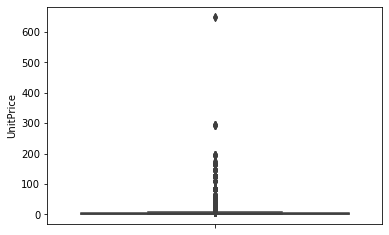

In [31]:
sns.boxplot(y='UnitPrice', data=data)

In [32]:
data.UnitPrice.quantile(0.99)

12.75

In [33]:
data.drop(data[data['UnitPrice'] > 12.75].index, inplace=True)

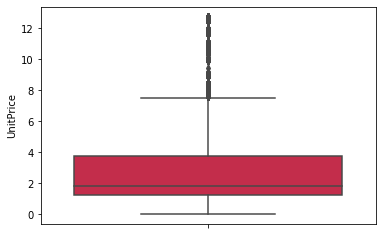

In [34]:
sns.boxplot(y='UnitPrice', data=data,color='crimson')

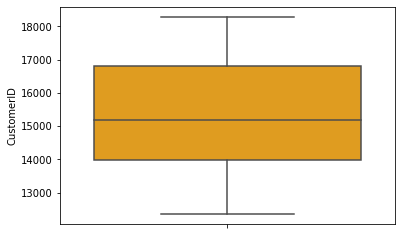

In [35]:
sns.boxplot(y='CustomerID', data=data,color='orange')

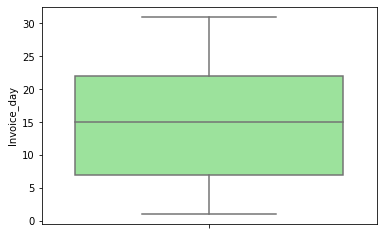

In [36]:
sns.boxplot(y='Invoice_day', data=data,color='lightgreen')

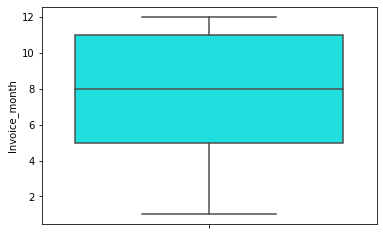

In [37]:
sns.boxplot(y='Invoice_month', data=data,color='cyan')

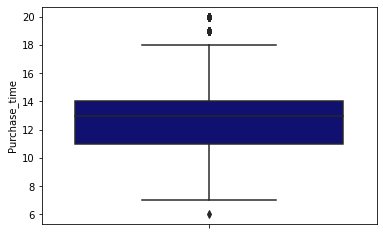

In [38]:
sns.boxplot(y='Purchase_time', data=data,color='navy')

# Aggregation for all numerical columns

- d. Aggregation for all numerical Columns

In [39]:
data.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Invoice_month,Invoice_day,Purchase_time,Sales
count,388962.000000,388962.000000,388962.00000,388962.000000,388962.000000,388962.000000,388962.000000,388962.000000,388962.000000
mean,560638.145742,30762.106450,9.93297,2.692172,15303.692258,7.618855,15.043146,12.735072,17.661411
std,13112.450901,20605.084514,14.59723,2.460244,1709.134300,3.416263,8.655707,2.268254,30.309793
min,536365.000000,10002.000000,1.00000,0.000000,12347.000000,1.000000,1.000000,6.000000,0.000000
25%,549239.000000,22023.000000,2.00000,1.250000,13975.000000,5.000000,7.000000,11.000000,4.470000
50%,561897.000000,22662.000000,6.00000,1.850000,15172.000000,8.000000,15.000000,13.000000,11.250000
75%,572103.000000,23271.000000,12.00000,3.750000,16805.000000,11.000000,22.000000,14.000000,18.720000
max,581587.000000,90214.000000,120.00000,12.750000,18287.000000,12.000000,31.000000,20.000000,1314.000000


# Unique value of all columns

- e. Unique Values across all columns

In [40]:
unique= data.nunique()
print('count of unique values in each column:')
unique

count of unique values in each column:


InvoiceNo        17955
StockCode         3145
Description       3814
Quantity           103
InvoiceDate      16779
UnitPrice          276
CustomerID        4289
Country             37
Invoice_month       12
Invoice_day         31
Purchase_time       15
Sales             2096
dtype: int64

# Value counts of each column

In [41]:
data['InvoiceNo'].value_counts()

576339    522
580727    506
579196    503
578270    419
573576    417
         ... 
578311      1
578249      1
555422      1
572100      1
576877      1
Name: InvoiceNo, Length: 17955, dtype: int64

In [42]:
data['StockCode'].value_counts()

85099    2851
85123    1998
22423    1707
47566    1702
84879    1355
         ... 
72815       1
37471       1
84620       1
71143       1
90041       1
Name: StockCode, Length: 3145, dtype: int64

In [43]:
data['Quantity'].value_counts()

1      70514
12     59996
2      56919
6      37530
4      31788
       ...  
59         1
93         1
55         1
117        1
81         1
Name: Quantity, Length: 103, dtype: int64

In [44]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     1991
REGENCY CAKESTAND 3 TIER               1707
JUMBO BAG RED RETROSPOT                1560
PARTY BUNTING                          1385
ASSORTED COLOUR BIRD ORNAMENT          1355
                                       ... 
5 STRAND GLASS NECKLACE AMETHYST          1
SILVER/CRYSTAL DROP EARRINGS W LEAF       1
BLACK DIAMOND CLUSTER NECKLACE            1
PINK CHRISTMAS FLOCK DROPLET              1
GLASS BEAD HOOP EARRINGS BLACK            1
Name: Description, Length: 3814, dtype: int64

In [45]:
data['CustomerID'].value_counts()

17841.0    7793
14911.0    5462
14096.0    4879
12748.0    4527
14606.0    2668
           ... 
13302.0       1
17986.0       1
14576.0       1
17747.0       1
13307.0       1
Name: CustomerID, Length: 4289, dtype: int64

In [46]:
data['Country'].value_counts()

United Kingdom          348281
Germany                   8549
France                    7933
EIRE                      6846
Spain                     2366
Belgium                   1889
Netherlands               1797
Switzerland               1785
Portugal                  1419
Norway                    1025
Australia                  963
Channel Islands            724
Italy                      719
Finland                    636
Cyprus                     588
Austria                    368
Denmark                    354
Sweden                     321
Poland                     320
Japan                      295
Israel                     244
Unspecified                238
Singapore                  212
Iceland                    181
USA                        178
Canada                     148
Greece                     140
Malta                      108
United Arab Emirates        64
RSA                         56
European Community          55
Lebanon                     43
Lithuani

In [47]:
data['Purchase_time'].value_counts()

12    70628
13    62863
14    53116
11    48026
15    44381
10    36717
16    23609
9     21250
17    12800
8      8393
19     3231
18     2820
20      779
7       348
6         1
Name: Purchase_time, dtype: int64

In [48]:
data['Invoice_day'].value_counts()

6     18039
5     15969
8     15568
7     15243
4     14569
17    14544
20    14309
23    13978
13    13878
14    13803
10    13761
1     13333
28    13145
11    13010
21    12740
9     12668
18    12565
16    12511
27    12237
22    12178
2     11833
24    11798
25    11785
15    11103
3     10580
19    10571
12    10327
30     9856
26     8478
29     7987
31     6596
Name: Invoice_day, dtype: int64

In [49]:
data['Invoice_month'].value_counts()

11    63355
10    48473
12    42546
9     39201
5     27624
3     26489
6     26472
8     26319
7     26192
4     22128
1     20704
2     19459
Name: Invoice_month, dtype: int64

# Orders made by the customers

- 6. How many orders made by the customers?

In [50]:
IC = data[['InvoiceNo','CustomerID']]

CQ = data[['CustomerID','Quantity']]

C_count=IC.groupby(['CustomerID']).count()

C_sum=CQ.groupby(['CustomerID']).sum()

Cust_orders = pd.merge(C_count, C_sum, how='left', on=['CustomerID'])

Cust_orders

,InvoiceNo,Quantity
CustomerID,,
12347.0,181,2218
12348.0,21,1468
12349.0,70,625
12350.0,16,196
12352.0,77,526
...,...,...
18280.0,10,45
18281.0,5,52
18282.0,12,103


# TOP 5 customers with higher number of orders

- 7. TOP 5 customers with higher number of orders

In [51]:
Top_5=Cust_orders.sort_values(by=['Quantity'], ascending=False)

Top_5.head(5)

,InvoiceNo,Quantity
CustomerID,,
14646.0,1543,89476
14911.0,5462,70263
14298.0,1582,46864
17511.0,849,43048
15311.0,2355,33957


# Money spent by the customers

- 8. How much money spent by the customers?

In [52]:
IC = data[['InvoiceNo','CustomerID']]

CQUS = data[['CustomerID','Quantity','UnitPrice','Sales']]

Cust_count=IC.groupby(['CustomerID']).count()

Cust_sum=CQUS.groupby(['CustomerID']).sum()

Money_spent = pd.merge(Cust_count, Cust_sum, how='left', on=['CustomerID'])

Money_spent

,InvoiceNo,Quantity,UnitPrice,Sales
CustomerID,,,,
12347.0,181,2218,480.17,4060.40
12348.0,21,1468,16.97,1186.68
12349.0,70,625,249.20,1353.80
12350.0,16,196,25.30,294.40
12352.0,77,526,313.81,1385.74
...,...,...,...,...
18280.0,10,45,47.65,180.60
18281.0,5,52,5.46,46.92
18282.0,12,103,62.39,178.05


# TOP 5 customers with highest money spent

- 9. TOP 5 customers with highest money spent

In [53]:
Top5_MS=Money_spent.sort_values(by=['Quantity'], ascending=False)
Top5_MS.head()

,InvoiceNo,Quantity,UnitPrice,Sales
CustomerID,,,,
14646.0,1543,89476,3563.34,154991.10
14911.0,5462,70263,16989.33,124205.21
14298.0,1582,46864,2416.92,47306.38
17511.0,849,43048,2068.60,73056.39
15311.0,2355,33957,5923.91,56576.11


# Orders per month 

- 10. How many orders per month?

In [54]:
IM = data[['InvoiceNo','Invoice_month']]

Orders_month=IM.groupby(['Invoice_month']).count()

Orders_month.reset_index()

,Invoice_month,InvoiceNo
0,1,20704
1,2,19459
2,3,26489
3,4,22128
4,5,27624
5,6,26472
6,7,26192
7,8,26319
8,9,39201
9,10,48473


# Orders trend across months

- 14. Orders trend across months

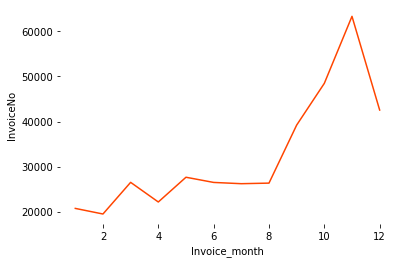

In [55]:
sns.lineplot(data=Orders_month.reset_index(), x="Invoice_month", y="InvoiceNo",color='orangered')
sns.despine(left=True, bottom=True)

# Orders per day

- 11. How many orders per day?

In [56]:
ID = data[['InvoiceNo','Invoice_day']]

Orders_day=ID.groupby(['Invoice_day']).count()

Orders_day.reset_index()

,Invoice_day,InvoiceNo
0,1,13333
1,2,11833
2,3,10580
3,4,14569
4,5,15969
5,6,18039
6,7,15243
7,8,15568
8,9,12668
9,10,13761


# Orders trend across days

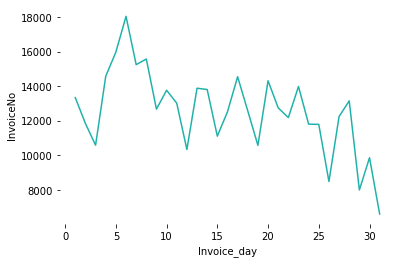

In [57]:
sns.lineplot(data=Orders_day.reset_index(), x="Invoice_day", y="InvoiceNo",color='lightseagreen')
sns.despine(left=True, bottom=True)

# Orders per hour

- 12. How many orders per hour?

In [58]:
IPT = data[['InvoiceNo','Purchase_time']]

Orders_hour=IPT.groupby(['Purchase_time']).count()

Orders_hour.reset_index()

,Purchase_time,InvoiceNo
0,6,1
1,7,348
2,8,8393
3,9,21250
4,10,36717
5,11,48026
6,12,70628
7,13,62863
8,14,53116
9,15,44381


# Orders trend across hours

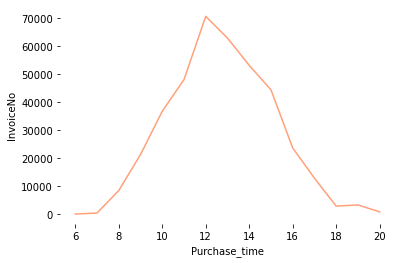

In [59]:
sns.lineplot(data=Orders_hour.reset_index(), x="Purchase_time", y="InvoiceNo", color='lightsalmon')
sns.despine(left=True, bottom=True)

# Orders for each country

- 13. How many orders for each country?

In [60]:
IC = data[['InvoiceNo','Country']]

CQ = data[['Country','Quantity']]

Country_count=IC.groupby(['Country']).count()

Country_sum=CQ.groupby(['Country']).sum()

Orders_Country = pd.merge(Country_count, Country_sum, how='left', on=['Country'])

Orders_Country

,InvoiceNo,Quantity
Country,,
Australia,963,34768
Austria,368,3987
Bahrain,17,260
Belgium,1889,22266
Brazil,32,356
Canada,148,1970
Channel Islands,724,8251
Cyprus,588,5458
Czech Republic,24,670


# Money spent by each country

- 15. How much money spent by each country?

In [61]:
IC = data[['InvoiceNo','Country']]

CQUS = data[['Country','Quantity','UnitPrice','Sales']]

Coun_count=IC.groupby(['Country']).count()

Coun_sum=CQUS.groupby(['Country']).sum()

Money_spent_country = pd.merge(Coun_count, Coun_sum, how='left', on=['Country'])

Money_spent_country

,InvoiceNo,Quantity,UnitPrice,Sales
Country,,,,
Australia,963,34768,2894.170000,7.785527e+04
Austria,368,3987,947.580000,7.304850e+03
Bahrain,17,260,78.950000,5.484000e+02
Belgium,1889,22266,5121.960000,3.501566e+04
Brazil,32,356,142.600000,1.143600e+03
Canada,148,1970,358.370000,2.520720e+03
Channel Islands,724,8251,2683.890000,1.781594e+04
Cyprus,588,5458,2037.220000,1.123468e+04
Czech Republic,24,670,38.270000,7.867400e+02


# Top 5 Countries with highest money revenue

- 15. How much money spent by each country?

In [62]:
Top5_Countries=Money_spent_country.sort_values(by=['Quantity'], ascending=False)

Top5_Countries.reset_index().head(5)

,Country,InvoiceNo,Quantity,UnitPrice,Sales
0,United Kingdom,348281,3221583,934427.099999,5.706775e+06
1,Germany,8549,110607,22246.310000,1.970163e+05
2,France,7933,103525,20065.980000,1.708885e+05
3,EIRE,6846,100773,21493.980000,1.959230e+05
4,Netherlands,1797,92881,4157.380000,1.595659e+05


# Barplot

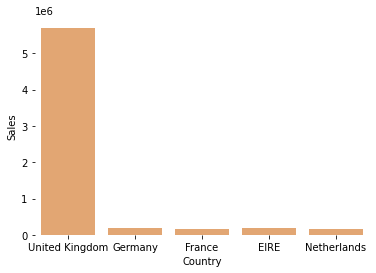

In [63]:
sns.barplot(x='Country',y='Sales',data=Top5_Countries.reset_index().head(5), estimator=np.sum,color='sandybrown');
sns.despine(left=True, bottom=True)

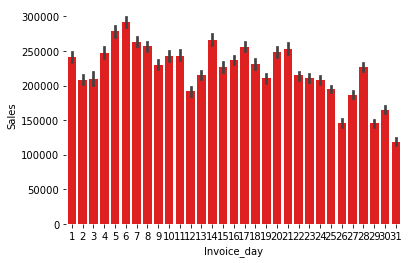

In [64]:
sns.barplot(x='Invoice_day',y='Sales',data=data, estimator=np.sum,color='red');
sns.despine(left=True, bottom=True)

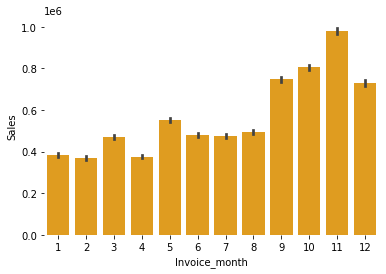

In [65]:
sns.barplot(x='Invoice_month',y='Sales',data=data, estimator=np.sum,color='orange');
sns.despine(left=True, bottom=True)

# Skewness all numeric variables

In [66]:
data.skew(axis=0,skipna=True)

InvoiceNo       -0.180952
StockCode        2.117466
Quantity         3.851205
UnitPrice        1.826128
CustomerID       0.021808
Invoice_month   -0.447706
Invoice_day      0.114680
Purchase_time    0.187108
Sales            9.096590
dtype: float64

# Distribution plot

The skewness of this distribution is 3.851204721207249
The Median of this distribution 6.0 is lesser than mean 9.932970315866331 of this distribution


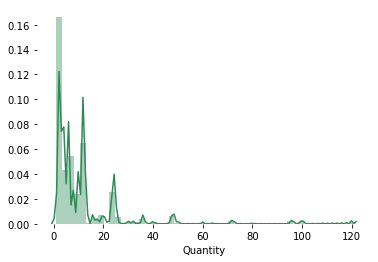

In [67]:
sns.distplot(data['Quantity'],color="seagreen");
sns.despine(left=True, bottom=True)
print('The skewness of this distribution is',data['Quantity'].skew())
print('The Median of this distribution {} is lesser than mean {} of this distribution'
      .format(data.Quantity.median(),data.Quantity.mean()))

The skewness of this distribution is 1.8261278222764725
The Median of this distribution 1.85 is lesser than mean 2.692171908821047 of this distribution


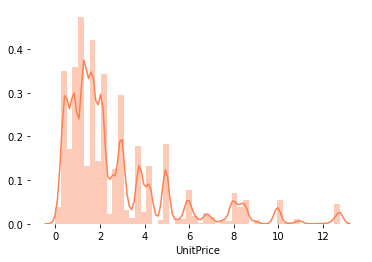

In [68]:
sns.distplot(data['UnitPrice'],color="coral");
sns.despine(left=True, bottom=True)
print('The skewness of this distribution is',data['UnitPrice'].skew())
print('The Median of this distribution {} is lesser than mean {} of this distribution'
      .format(data.UnitPrice.median(),data.UnitPrice.mean()))

The skewness of this distribution is 2.117466091615666
The Median of this distribution 22662.0 is lesser than mean 30762.1064499874 of this distribution


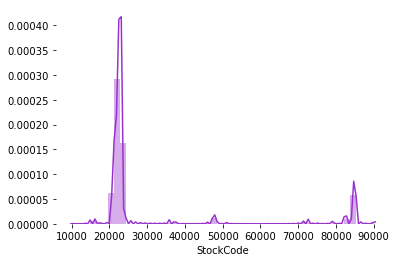

In [69]:
sns.distplot(data['StockCode'],color="darkorchid");
sns.despine(left=True, bottom=True)
print('The skewness of this distribution is',data['StockCode'].skew())
print('The Median of this distribution {} is lesser than mean {} of this distribution'
      .format(data.StockCode.median(),data.StockCode.mean()))

# Pairplot

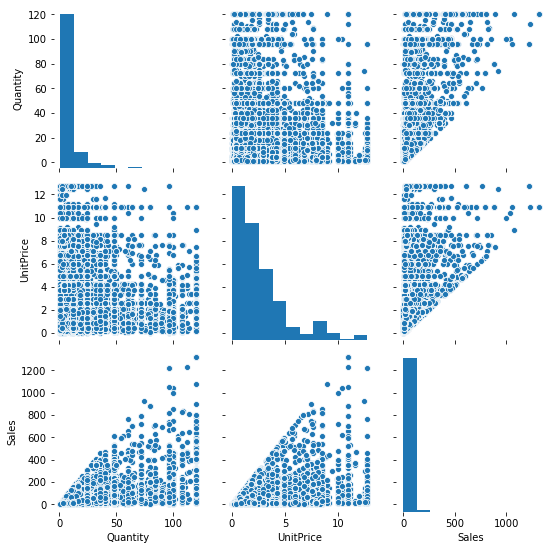

In [70]:
sns.pairplot(data,vars=['Quantity','UnitPrice','Sales']);
sns.despine(left=True, bottom=True)

# Regression Plot

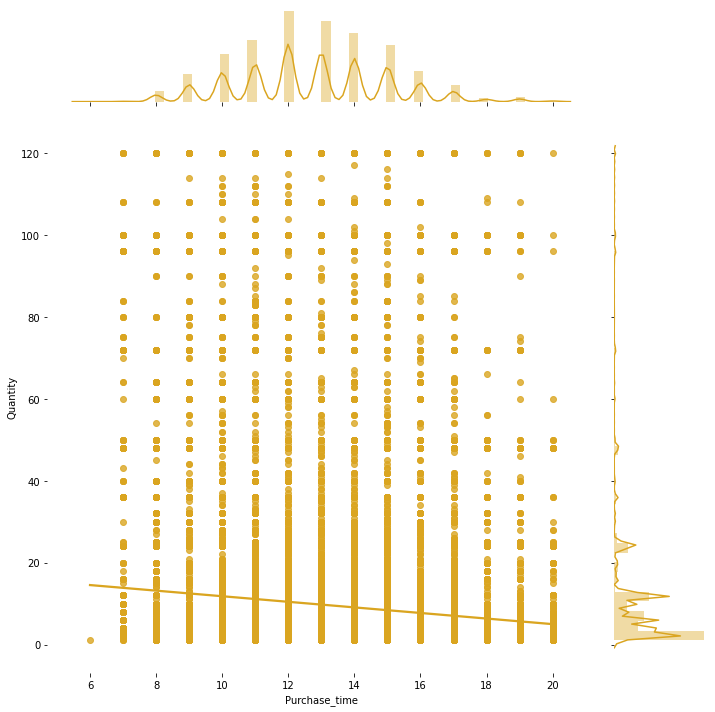

In [71]:
sns.jointplot(x='Purchase_time',y='Quantity',data=data,kind='reg',color='goldenrod',size=10)
sns.despine(left=True, bottom=True)

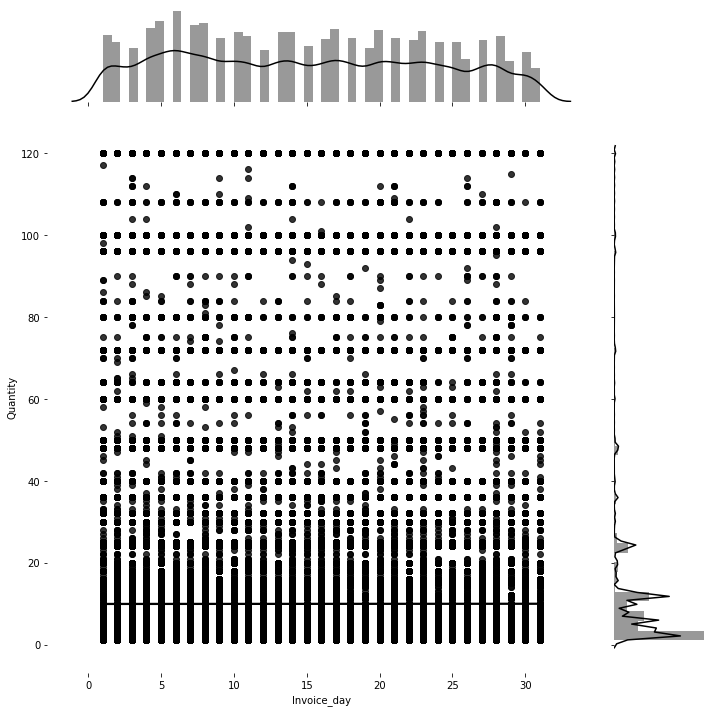

In [72]:
sns.jointplot(x='Invoice_day',y='Quantity',data=data,kind='reg',color='black',size=10)
sns.despine(left=True, bottom=True)

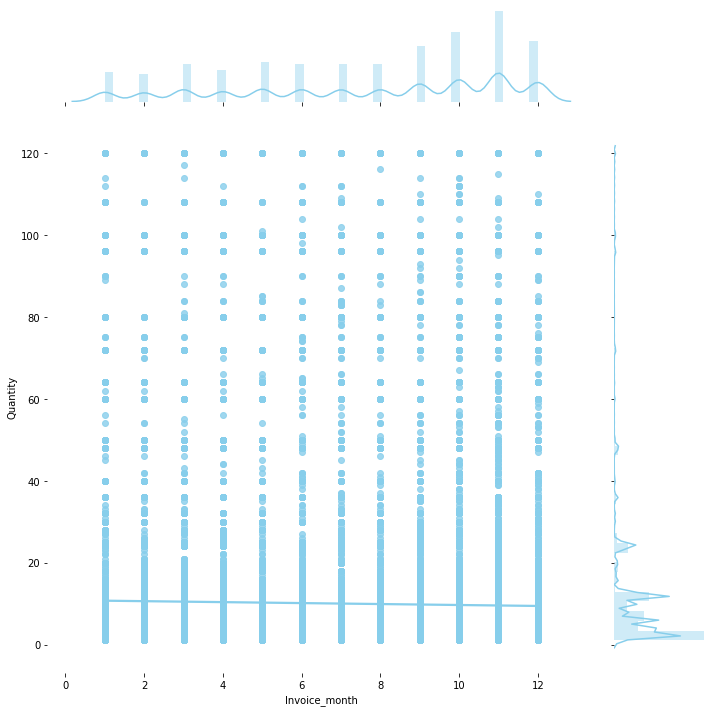

In [73]:
sns.jointplot(x='Invoice_month',y='Quantity',data=data,kind='reg',color='skyblue',size=10)
sns.despine(left=True, bottom=True)

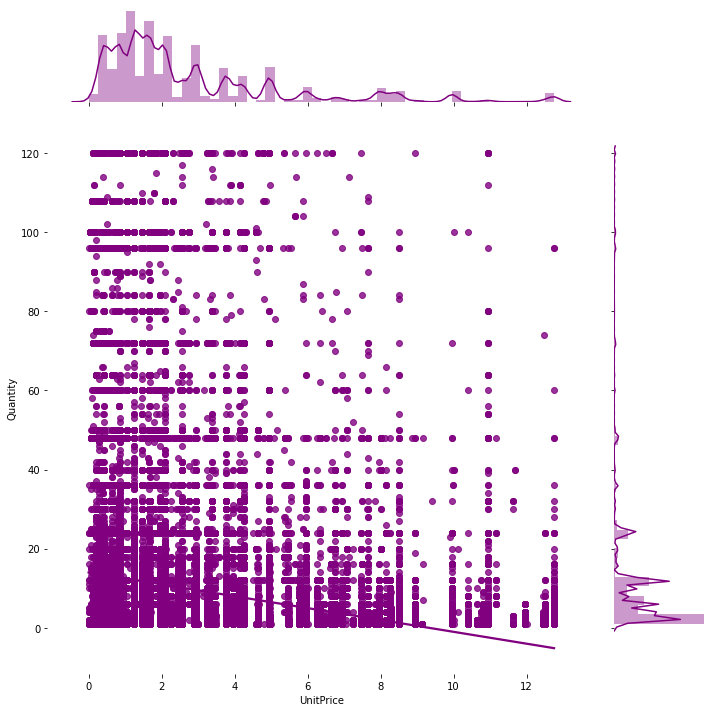

In [74]:
sns.jointplot(x='UnitPrice',y='Quantity',data=data,kind='reg',color='purple',size=10)
sns.despine(left=True, bottom=True)

# Histogram

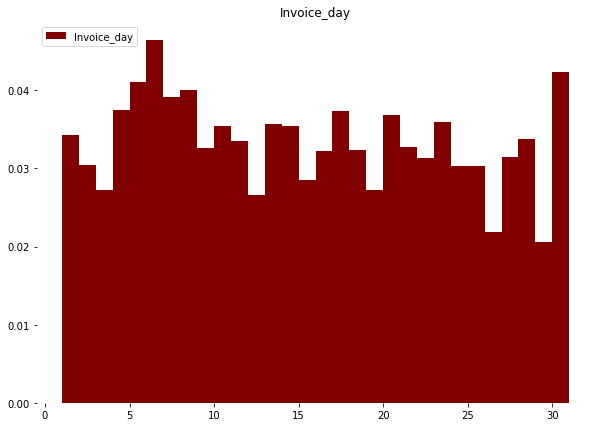

In [75]:
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
plt.hist(data['Invoice_day'],color='maroon', density=True, bins=30,label='Invoice_day') 
plt.legend(loc="upper left")
plt.title("Invoice_day");
sns.despine(left=True, bottom=True)
# Show plot 
plt.show() 

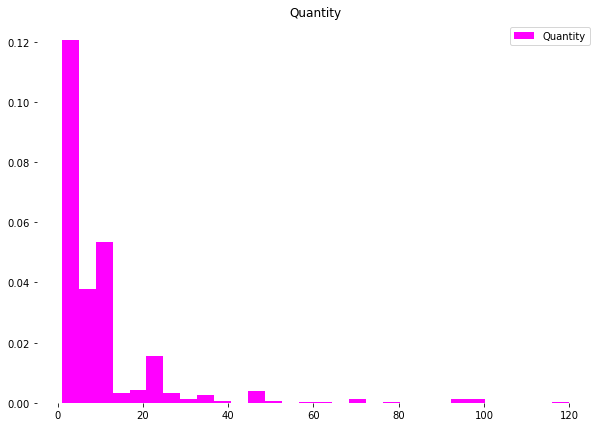

In [76]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.hist(data['Quantity'],color = 'magenta', density=True, bins=30,label='Quantity')  
plt.legend(loc="upper right")
plt.title("Quantity");
sns.despine(left=True, bottom=True)
# Show plot 
plt.show()

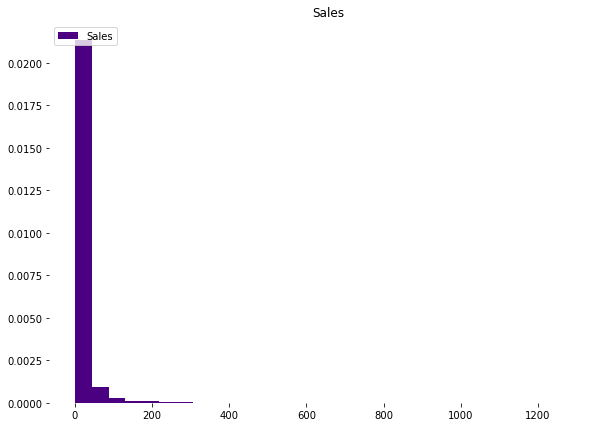

In [77]:
fig, ax = plt.subplots(figsize =(10, 7)) 
plt.hist(data['Sales'],color = 'indigo', density=True, bins=30,label='Sales')  
plt.legend(loc="upper left")
plt.title("Sales");
sns.despine(left=True, bottom=True)
# Show plot 
plt.show()

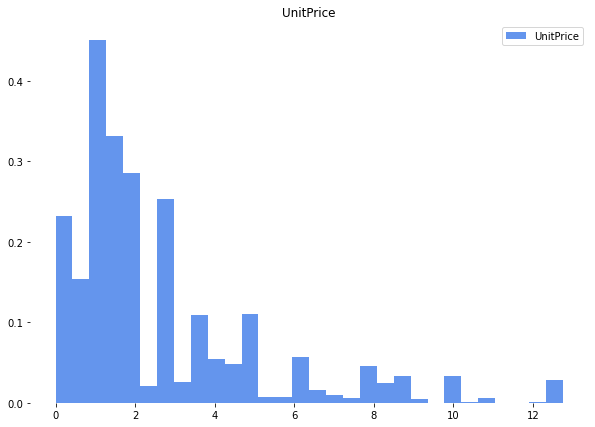

In [78]:
fig, ax = plt.subplots(figsize =(10, 7)) 
plt.hist(data['UnitPrice'],color = 'cornflowerblue', density=True, bins=30,label='UnitPrice')  
plt.legend(loc="upper right")
plt.title("UnitPrice");
sns.despine(left=True, bottom=True)
# Show plot 
plt.show()

# Heatmap

In [79]:
c=data.corr()

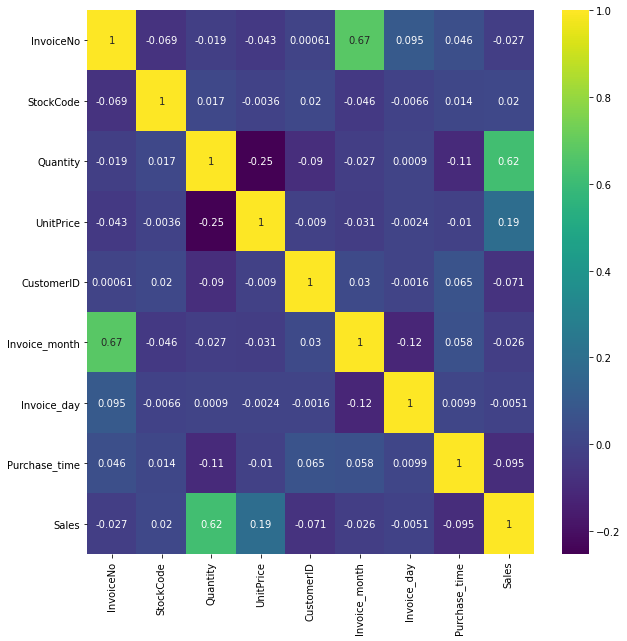

In [80]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap( c, cmap='viridis' , annot=True ,ax=ax );